# 1. Импорт необходимых библиотек и модулей

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

# print("TensorFlow version:", tf.__version__)

%matplotlib inline

# 2. Чтение данных из файла
## 2.1 Чтение экспериментальных данных из .csv

In [2]:
DATASET_PATH = '../dataset'
FILE_NAME = 'КТ117№1_п1(база 2)_2500Гц-1Гц_1пФ_+10С_-1В-2В_100мВ_20мкс_шаг_0,1.csv'

In [3]:
file_name = DATASET_PATH + '/' + FILE_NAME

In [4]:
data = pd.read_csv(file_name, 
                   header = 0,
                   parse_dates = [0],
                   infer_datetime_format = True
                  )
data.head()

,time,frequency_hz,dlts_v,temperature_k,dlts_pf,bs,ls,f_pulse,u1,ur,time_between_meas,integral_time,specimen_name
0,2022-05-06 11:04:58,2500.0000,-2.962,283.160,-0.002962,1,100,20.0,-1.0,-2.0,3.5,3.0,КТ117№1 п1(база 2)
1,2022-05-06 11:05:02,1985.8207,-3.090,283.155,-0.003090,1,100,20.0,-1.0,-2.0,3.5,3.0,КТ117№1 п1(база 2)
2,2022-05-06 11:05:06,1577.3937,-3.359,283.157,-0.003359,1,100,20.0,-1.0,-2.0,3.5,3.0,КТ117№1 п1(база 2)
3,2022-05-06 11:05:10,1252.9686,-3.717,283.143,-0.003717,1,100,20.0,-1.0,-2.0,3.5,3.0,КТ117№1 п1(база 2)
4,2022-05-06 11:05:14,995.2686,-4.068,283.151,-0.004068,1,100,20.0,-1.0,-2.0,3.5,3.0,КТ117№1 п1(база 2)


## 2.2 Подготовка данных для TensorFlow

In [5]:
dlts = tf.Variable(data.dlts_pf.to_numpy(), 
                   dtype = 'float64')

frequency = tf.Variable(data.frequency_hz.to_numpy(),
                        dtype = 'float64')

filling_pulse = tf.Variable(data.f_pulse.mean() * 10**-6, dtype = 'float64')

In [6]:
dlts

<tf.Variable 'Variable:0' shape=(34,) dtype=float64, numpy=
array([-0.002962 , -0.00309  , -0.003359 , -0.003717 , -0.004068 ,
       -0.004412 , -0.004726 , -0.004987 , -0.005196 , -0.005324 ,
       -0.00535  , -0.005206 , -0.004956 , -0.004595 , -0.004188 ,
       -0.003708 , -0.003185 , -0.002636 , -0.00212  , -0.001617 ,
       -0.001227 , -0.0008936, -0.0006148, -0.0004478, -0.0003487,
       -0.0002713, -0.0002188, -0.0001308, -0.0001205, -0.0001234,
       -0.000126 , -0.0001831, -0.0001326, -0.0001376])>

In [7]:
frequency

<tf.Variable 'Variable:0' shape=(34,) dtype=float64, numpy=
array([2.5000000e+03, 1.9858207e+03, 1.5773937e+03, 1.2529686e+03,
       9.9526860e+02, 7.9057010e+02, 6.2797230e+02, 4.9881630e+02,
       3.9622390e+02, 3.1473190e+02, 2.5000050e+02, 1.9858250e+02,
       1.5773970e+02, 1.2529710e+02, 9.9527100e+01, 7.9057100e+01,
       6.2797300e+01, 4.9881700e+01, 3.9622400e+01, 3.1473200e+01,
       2.5000100e+01, 1.9858200e+01, 1.5774000e+01, 1.2529700e+01,
       9.9527000e+00, 7.9057000e+00, 6.2797000e+00, 4.9882000e+00,
       3.9622000e+00, 3.1473000e+00, 2.5000000e+00, 1.9858000e+00,
       1.5774000e+00, 1.2530000e+00])>

In [8]:
filling_pulse

<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=1.9999999999999998e-05>

## 2.3 График

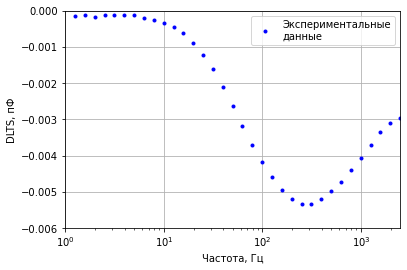

In [9]:
plt.semilogx(frequency.numpy(), dlts.numpy(), '.b', label='Экспериментальные\nданные')
plt.grid()
plt.xlim([1, 2500])
plt.ylim([-0.006, 0])
plt.legend()
plt.ylabel('DLTS, пФ')
plt.xlabel('Частота, Гц')
plt.show()

## 2.4 Подготовка данных

In [10]:
frequency = np.log10(frequency)
frequency

array([3.39794001, 3.29794003, 3.1979401 , 3.09794019, 2.9979403 ,
       2.89794038, 2.79794049, 2.69794064, 2.59794067, 2.49794076,
       2.39794088, 2.29794097, 2.19794101, 2.09794102, 1.99794135,
       1.89794088, 1.79794097, 1.69794125, 1.59794078, 1.4979409 ,
       1.39794175, 1.29793988, 1.19794184, 1.09794067, 0.99794091,
       0.89794033, 0.7979389 , 0.69794386, 0.59793639, 0.49793814,
       0.39794001, 0.29793551, 0.19794184, 0.09795107])

In [11]:
dlts = dlts * np.max(frequency) / (np.max(dlts) - np.min(dlts))
dlts

<tf.Tensor: shape=(34,), dtype=float64, numpy=
array([-1.9246005 , -2.00777027, -2.18255674, -2.4151722 , -2.64323931,
       -2.86675807, -3.07078391, -3.24037228, -3.37617292, -3.45934269,
       -3.47623655, -3.38267056, -3.2202296 , -2.98566485, -2.72121097,
       -2.40932432, -2.06949783, -1.71277749, -1.37749934, -1.05066813,
       -0.79726023, -0.58062897, -0.39947481, -0.29096425, -0.22657265,
       -0.17628093, -0.14216833, -0.08498911, -0.07829654, -0.08018086,
       -0.08187024, -0.11897176, -0.08615869, -0.0894075 ])>

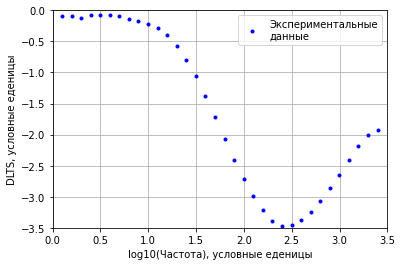

In [12]:
plt.plot(frequency, dlts, '.b', label='Экспериментальные\nданные')
plt.grid()
plt.xlim([0, 3.5])
plt.ylim([-3.5, 0])
plt.legend()
plt.ylabel('DLTS, условные еденицы')
plt.xlabel('log10(Частота), условные еденицы')
plt.show()

# 3. Описание модели
Выходной сигнал коррелятора спектрометра DLS-82E определяется выражением:
\begin{equation}
    \label{eq:eq1}
    S\left(\tau,C_A,F_0, t_1\right) = C_A K_{BS} K_{LS} \phi\left(\tau,F_0,t_1\right),
\end{equation}
где  
$C_A$ - амплитуда емкостного релаксационного сигнала,  
$K_{BS}$ - масштабный коэффициент, зависящий от чувствительности емкостного моста,  
$K_{LS}$ - масштабный коэффициент селектора,  
$\tau$ - постоянная времени релаксации гулбокого уровня,  
$F_0$ - частота сканирования импульсов заполнения,  
$t_1$ - длительность импульса заполнения,  
$\phi\left(\tau,F_0,t_1\right)$ - функция определяемая выражением:  
\begin{equation}
    \label{eq:eq2}
    \phi\left(\tau,F_0,t_1\right) = 
    M \tau F_0 e^{-\frac{0.05}{\tau F_0}}
    \left(1-e^{\frac{t_1 F_0-0.45}{\tau F_0}}
    -e^{-\frac{0.5}{\tau F_0}}+
    e^{\frac{t_1 F_0-0.95}{\tau F_0}}\right),
\end{equation}
где $M$ -- масштабный множитель.

Таким образом,
$$  M = \frac{1}{\max{\left[
    \tau F_0 e^{-\frac{0.05}{\tau F_0}}
    \left(1-e^{\frac{t_1 F_0-0.45}{\tau F_0}}
    -e^{-\frac{0.5}{\tau F_0}}+
    e^{\frac{t_1 F_0-0.95}{\tau F_0}}\right)
    \right]}}
$$

# 4. Кодирование модели
## 4.1 Функция `get_phi()`
$$ \tau = 10^{time\_constant\_power} $$
$$ F_0 = 10^{frequency\_power}$$
$$ a = \tau F_0 $$
$$ b = t_1 F_0 $$
$$ exp0 = \exp{\left(\frac{-0.05}{a}\right)} $$
$$ exp1 = \exp{\left(\frac{b-0.45}{a}\right)} $$
$$ exp2 = \exp{\left(\frac{-0.5}{a}\right)} $$
$$ exp3 = \exp{\left(\frac{b-0.95}{a}\right)} $$
$$ \phi = M \cdot a \cdot exp0 \cdot \left(1.0 - exp1 - exp2 + exp3\right) $$

In [13]:
def get_phi(frequency_power, time_constant_power, M, filling_pulse):
    time_constant = tf.pow(10.0, time_constant_power)
    frequency = tf.pow(10, frequency_power)

    a = time_constant * frequency
    b = filling_pulse * frequency

    exp0 = tf.exp(-0.05 / (a))
    exp1 = tf.exp((b - 0.45) / (a))
    exp2 = tf.exp(-0.5 / (a))
    exp3 = tf.exp((b - 0.95) / (a))

    phi = M * a * exp0 * (1.0 - exp1 - exp2 + exp3)

    return phi

## 4.2 Функция `get_dlts()`
$$ DLTS = A \cdot \phi $$

In [14]:
# def get_dlts(amplitude, M, frequency_power, time_constant_power, filling_pulse):
#     dlts = amplitude * get_phi(frequency_power, 
#                                time_constant_power, 
#                                M, 
#                                filling_pulse)
    
#     return dlts

## 4.3 Определение функции потерь для DLTS (для модели). Функция `loss_dlts()`
Среднеквадратическая ошибка


In [15]:
def loss(target_y, predicted_y):
    return tf.reduce_mean(tf.square(target_y - predicted_y))

## 4.5 Определение модели для $\phi$

In [16]:
class PhiModel(tf.Module):
    def __init__(self, 
                 time_constant_power,
                 filling_pulse,
                 M = 5.861,
                 **kwargs):
        
        super().__init__(**kwargs)
        
        self.time_constant_power = tf.Variable(time_constant_power, 
                                               dtype='float64', 
                                               name='time constant power'
                                              )
        self.filling_pulse = tf.Variable(filling_pulse, 
                                         dtype='float64',
                                         name='filling pulse'
                                        )
        self.M = tf.Variable(M, 
                             dtype='float64',
                             name='M'
                            )
        
    def __call__(self, frequency_power):
        return get_phi(frequency_power, 
                       self.time_constant_power, 
                       self.M, 
                       self.filling_pulse)
    
    
phi_model = PhiModel(time_constant_power=tf.Variable(-3.0, dtype='float64'), 
                     filling_pulse=filling_pulse)

for i, v in enumerate(phi_model.variables):
    print(f'Variable {i}:', v)

print(phi_model(frequency_power=tf.Variable(3.0, dtype='float64')))

Variable 0: <tf.Variable 'M:0' shape=() dtype=float64, numpy=5.861>
Variable 1: <tf.Variable 'filling pulse:0' shape=() dtype=float64, numpy=1.9999999999999998e-05>
Variable 2: <tf.Variable 'time constant power:0' shape=() dtype=float64, numpy=-3.0>
tf.Tensor(0.7666617093509135, shape=(), dtype=float64)


## 4.6 Идентификация коэффициента $M$

In [17]:
def train_M(phi_model,
            learning_rate=0.1,
            n_iters=100,
            stop_val = None,
            verbose = False
           ):
    
    prev_loss = tf.Variable(np.inf, dtype='float64')
    max_freq_pow = tf.Variable(-phi_model.time_constant_power, dtype='float64')
    
    for _ in range(n_iters):
        with tf.GradientTape() as tape:
            current_loss = 0.0 - phi_model(max_freq_pow)
            
        if verbose:
            print(_)
            print(current_loss)
            print(max_freq_pow)
        
        if stop_val is not None:
            if tf.abs(current_loss - prev_loss) < stop_val:
                break
        
        dfreq_pow = tape.gradient(current_loss, max_freq_pow)
        max_freq_pow.assign_sub(learning_rate * dfreq_pow)
        
        prev_loss = current_loss
        
    phi_model.M = phi_model.M / phi_model(max_freq_pow)

In [18]:
train_M(phi_model,
        learning_rate=0.2,
        n_iters=100,
        stop_val = 10**-10,
        verbose = True
       )

0
tf.Tensor(-0.7666617093509135, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=3.0>
1
tf.Tensor(-0.9330581559008366, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.8028741021552417>
2
tf.Tensor(-0.9859552099662315, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.6765808286045165>
3
tf.Tensor(-0.9896401527850601, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.6407319631001838>
4
tf.Tensor(-0.9897090566798898, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.635757079374996>
5
tf.Tensor(-0.9897099286163724, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.6351964615525425>
6
tf.Tensor(-0.989709939088478, shape=(), dtype=float64)
<tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.635135011043419>
7
tf.Tensor(-0.9897099392135178, shape=(), dtype=float64)
<tf.Variable 'Variable

In [19]:
phi_model.M

<tf.Tensor: shape=(), dtype=float64, numpy=5.921937092648238>

In [20]:
del phi_model

## 4.7 Определение модели частотного скана

In [21]:
class FeqScanModel(tf.Module):
    
    def __init__(self,
                 amplitude,
                 time_constant_power,
                 filling_pulse,
                 **kwargs):
        super().__init__(**kwargs)
        
        self.amplitude = tf.Variable(amplitude, dtype='float64')
        
        self.filling_pulse = tf.Variable(filling_pulse, dtype='float64')
        
        self.time_constant_power = tf.Variable(time_constant_power, dtype='float64')
    
        self.phi_model = PhiModel(time_constant_power=self.time_constant_power, 
                                  filling_pulse=self.filling_pulse)
        
        train_M(self.phi_model,
                learning_rate=0.2,
                n_iters=100,
                stop_val = 10**-10,
                verbose = False
               )
        

    def __call__(self, frequency_power):
        return self.amplitude * self.phi_model(frequency_power)

In [22]:
fs_model = FeqScanModel(amplitude = 1.0,
                        time_constant_power = -3.0,
                        filling_pulse = 20.0*10**-6)

In [23]:
new_frequency = tf.Variable(frequency, dtype='float64')

In [24]:
new_dlts = fs_model(new_frequency)

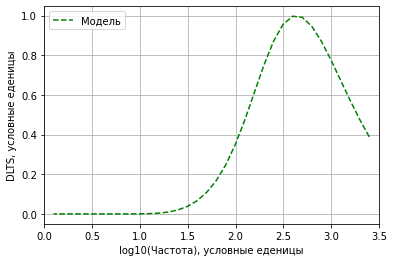

In [25]:
plt.plot(new_frequency.numpy(), new_dlts.numpy(), '--g', label='Модель')
plt.grid()
plt.xlim([0, 3.5])
# plt.ylim([-3.5, 0])
plt.legend()
plt.ylabel('DLTS, условные еденицы')
plt.xlabel('log10(Частота), условные еденицы')
plt.show()